# Primitives

Primitives, ou primitivos, são a menor instrução de processamento para um dado níel de abstração. Já vimos o exemplo do Estimator (estomador) anteriormente. A seguir veremos o exemplo do Sampler (amostrador).

## Sampler

O Sampler retorna strings de bits com resultados shot-by-shot amostrados a partir da distribuição de probabilidades do estado quântico preparado na máquina.

A seguir usaremos o paper da utilidade da IBM, que considera o modelo de Ising em um campo transverso:
$$H = -J\sum_{\langle j,k\rangle}Z_j Z_k + h\sum_j X_j = H_{ZZ} + H_X.$$

Para a trotterização usaremos
\begin{align}
& e^{-iH_{ZZ}\delta t} = \Pi_{\langle j,k\rangle}e^{iJ\delta t Z_j Z_k} = \Pi_{\langle j,k\rangle}R_{Z_j Z_k}(-2J\delta t), \\
& e^{-iH_{X}\delta t} = \Pi_j e^{iJ\delta t X_j} = \Pi_j R_{Z_j}(2h\delta t).
\end{align}
A seguir, por simplicação, faremos
$$\theta_J = -2J\delta t = -\pi/2.$$

In [2]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.5 MB/s eta 0:00:00


In [3]:
pip install matplotlib

In [4]:
pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 14.7 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.53.7-py3-none-any.whl size=340285 sha256=1394f44ae01c5ba767143624c390770ce67626437083640cb614c5dc26c33096
  Stored in directory: /root/.cache/pip/wheels/8e/54/ad/63e8fdae0e85463bc04a21acf5364cff6def892b95dc40f3ed
  Created wheel for ibm-cloud-sdk

In [5]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=3cf260be5b690bb52ddac45f7755f37c96ac18056177a31f6556378873d62758
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [6]:
pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 22.5 MB/s eta 0:00:00


In [7]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import YGate, UnitaryGate

SYGate = UnitaryGate(YGate().power(1/2), label=r'$\sqrt{Y}$')
SYdgGate = UnitaryGate(SYGate.inverse(), label=r'$\sqrt{Y}^\dagger$')

In [ ]:
def generate_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, num_cl_bits = 0, trotter_barriers = False, layer_barriers = False):
  if num_cl_bits == 0:
    qc = QuantumCircuit(num_qubits)
  else:
    qc = QuantumCircuit(num_qubits, num_cl_bits)
  for trotter_steps in range(num_trotter_steps):
    add_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers)
    if trotter_barriers:
      qc.barrier()
  return qc

def add_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers = False):
  # Adding Rzz in the even layers
  for j in range(0, qc.num_qubits-1, 2):
    qc.sdg([j,j+1])
    qc.append(SYGate, [j+1])
    qc.cx(j,j+1)
    qc.append(SYdgGate, [j+1])
  if layer_barriers:
    qc.barrier()
  # Adding Rzz in the even layers
  for j in range(1, qc.num_qubits-1, 2):
    qc.sdg([j,j+1])
    qc.append(SYGate, [j+1])
    qc.cx(j,j+1)
    qc.append(SYdgGate, [j+1])
  if layer_barriers:
    qc.barrier()
  # Adding Rx gates
  qc.rx(rx_angle, list(range(qc.num_qubits)))
  if layer_barriers:
    qc.barrier()

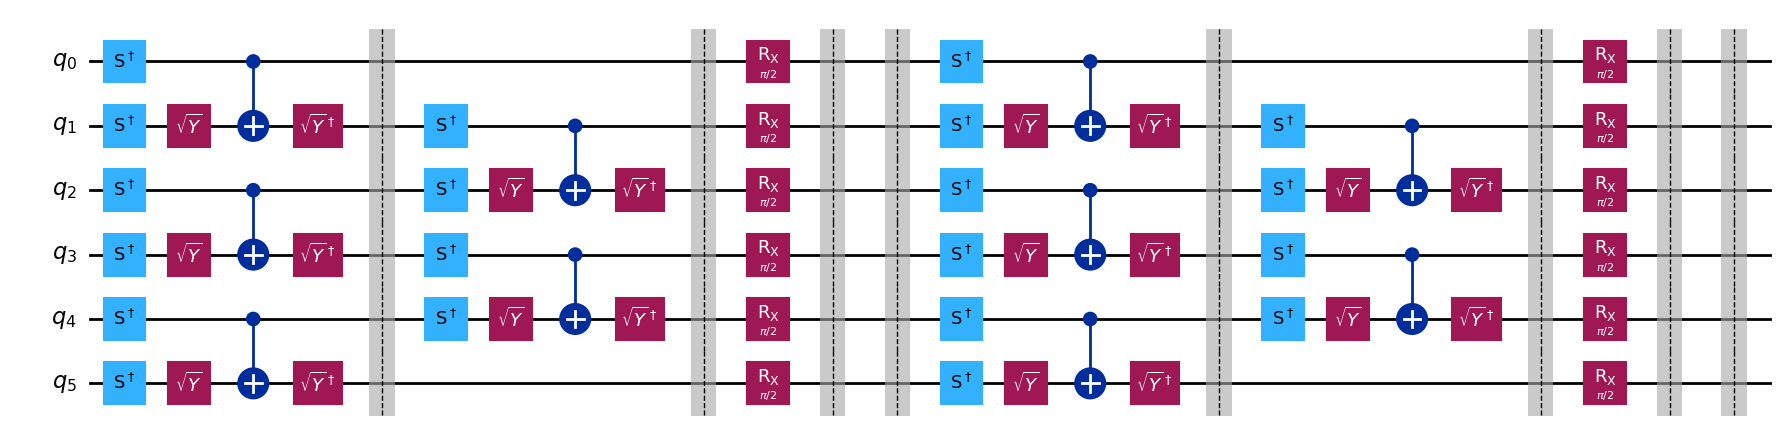

In [ ]:
num_qubits = 6
num_trotter_steps = 2
import numpy as np
rx_angle = 0.5*np.pi
qc = generate_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, trotter_barriers = True, layer_barriers = True)
qc.draw(output='mpl', fold=-1)

Backward circuit

In [ ]:
def append_mirrored_tfim_circuit(qc, num_qubits, num_trotter_steps, rx_angle, trotter_barriers = False, layer_barriers = False):
  for trotter_steps in range(num_trotter_steps):
    add_mirrored_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers)
    if trotter_barriers:
      qc.barrier()

def add_mirrored_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers = False):
  # Adding Rx gates
  qc.rx(-rx_angle, list(range(qc.num_qubits)))
  if layer_barriers:
    qc.barrier()
  # Adding Rzz in the even layers
  for j in range(1, qc.num_qubits-1, 2):
    qc.append(SYGate, [j+1])
    qc.cx(j,j+1)
    qc.append(SYdgGate, [j+1])
    qc.s([j,j+1])
  if layer_barriers:
    qc.barrier()
  # Adding Rzz in the even layers
  for j in range(0, qc.num_qubits-1, 2):
    qc.append(SYGate, [j+1])
    qc.cx(j,j+1)
    qc.append(SYdgGate, [j+1])
    qc.s([j,j+1])
  if layer_barriers:
    qc.barrier()

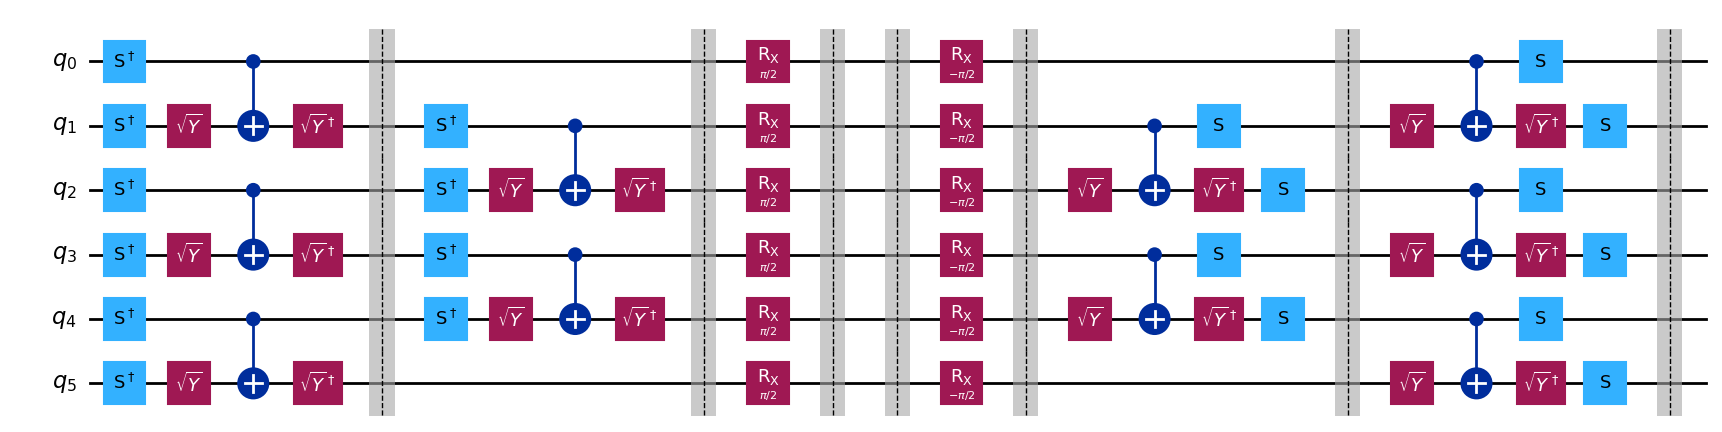

In [ ]:
num_qubits = 6
num_trotter_steps = 1
import numpy as np
rx_angle = 0.5*np.pi
qc = generate_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, trotter_barriers = True, layer_barriers = True)
add_mirrored_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers = True)
qc.draw(output='mpl', fold=-1)

## Passo 1: Mapear o problema em circuitos e observáveis

In [ ]:
num_qubits = 8
max_trotter_steps = 10
measured_qubits = [4, 5]
qc_list = []
for trotter_step in range(max_trotter_steps):
  qc = generate_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, num_cl_bits = len(measured_qubits), trotter_barriers = True, layer_barriers = True)
  add_mirrored_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers = True)
  qc.measure(measured_qubits, list(range(len(measured_qubits))))
  qc_list.append(qc)

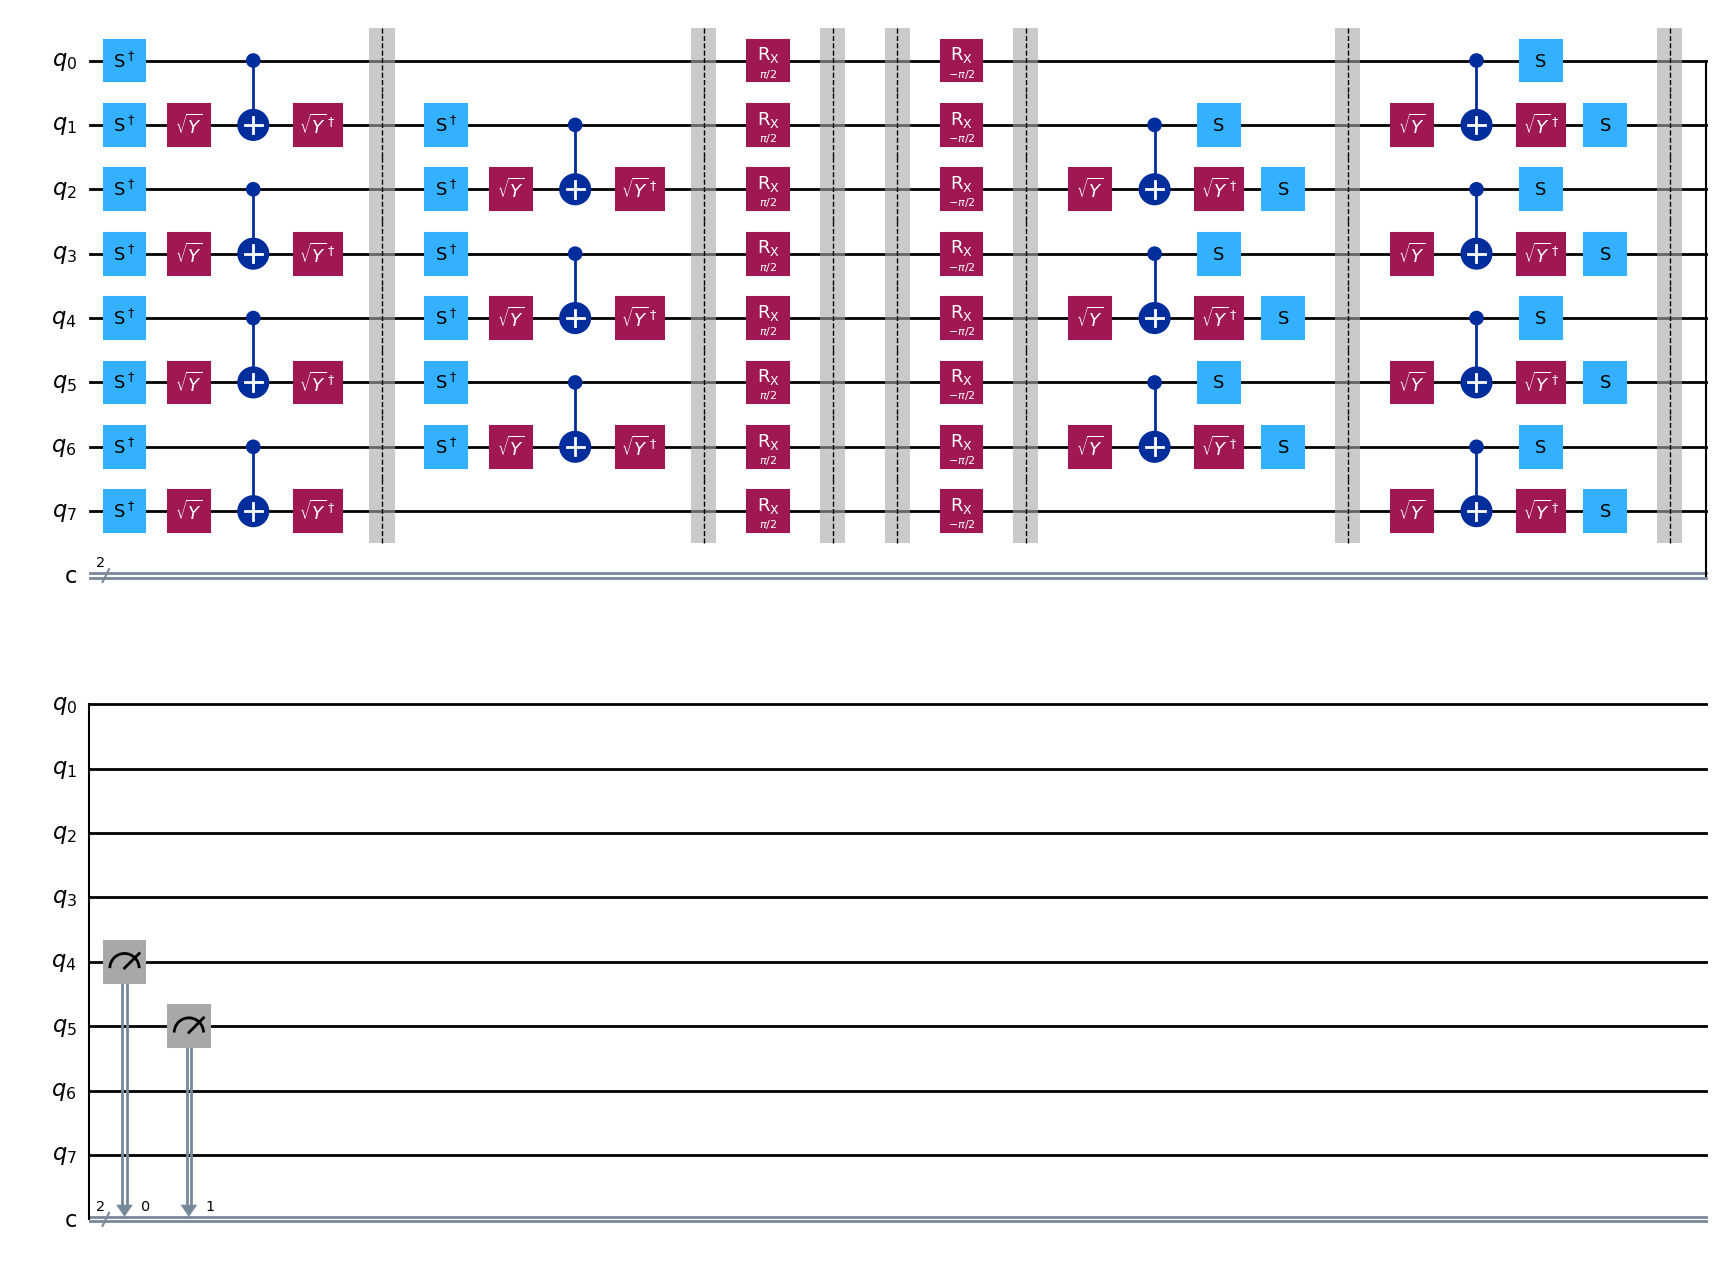

In [ ]:
qc_list[1].draw(output='mpl')

In [ ]:
num_qubits = 100
max_trotter_steps = 10
measured_qubits = [49, 50]
qc_list = []
for trotter_step in range(max_trotter_steps):
  qc = generate_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, num_cl_bits = len(measured_qubits), trotter_barriers = True, layer_barriers = True)
  add_mirrored_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers = True)
  qc.measure(measured_qubits, list(range(len(measured_qubits))))
  qc_list.append(qc)

## Passo 2: Otimizar os circuitos para execução

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum", token="83ab2a86232e48767228534cdae2cf55b8e8ea4e0eb1e57804268f40d7bee64692f719528e8871de617ffc35040d21bd389f4696313f46900c077c7f617a1512")
backend = service.backend(name="ibm_brisbane")

In [ ]:
from qiskit import transpile
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

## Passo 3: Executar no hardware

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

## Passo 4: Pós-processamento e gráficos

In [ ]:
job_id = "csafjq2nx7g0008mw4x0"
job = service.job(job_id)

In [ ]:
job.result()[0].data.c.get_counts()

{'00': 3899, '01': 99, '10': 96, '11': 2}

In [ ]:
survival_probability_list = []
for trotter_step in range(max_trotter_steps):
  try:
    data = job.result()[trotter_step].data
    survival_probability_list.append(data.c.get_counts()['0'*len(measured_qubits)] / data.c.num_shots)
  except:
    survival_probability_list.append(0)

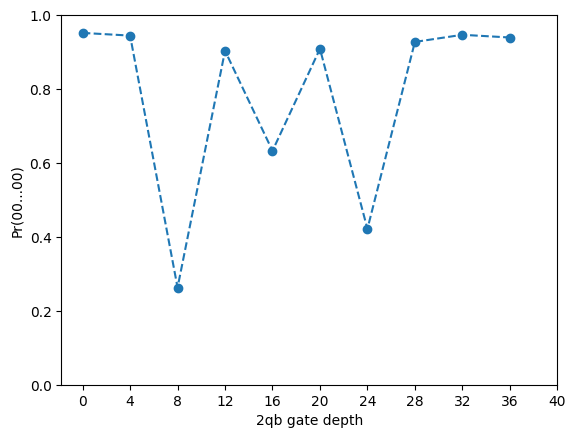

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(0, 4*max_trotter_steps, 4)), survival_probability_list, '--o')
plt.xlabel('2qb gate depth')
plt.ylabel('Pr(00...00)')
plt.ylim(0,1)
plt.xticks(np.arange(0,44,4))
plt.show()